In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
# Load dataset "companies" divided on train and test sample.
# AFTER encoding categorical variables (e.g., one-hot encoding)

with open("outputs/df_companies_train_test_encoded.pkl", "rb") as f: # rb = read in a binary mode
   df_companies_train_encoded = pickle.load(f)
   df_companies_test_encoded = pickle.load(f)

df_companies_test_encoded.head() 

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,GS10,UMCSENT,negative_equity_flag,label_Cloud & Data,label_Collab & CX SaaS,label_Consumer SaaS,label_Enterprise SaaS,label_Mature Pivots,label_Mega‑Cap Tech,label_Vertical SaaS
346,5.859440e+08,-452551000.0,264041000.0,5.821620e+08,-462674000.0,0.510694,-0.789622,-0.772345,0.450625,0.993545,...,2.951667,58.975000,False,1,0,0,0,0,0,0
378,2.065659e+09,-797526000.0,788058000.0,1.402328e+09,-842267000.0,0.694098,-0.407747,-0.386088,0.381504,0.678877,...,2.951667,58.975000,False,1,0,0,0,0,0,0
293,8.743320e+08,-41459000.0,218523000.0,4.339510e+08,-27626000.0,0.134362,-0.031597,-0.047418,0.249931,0.496323,...,1.442500,77.616667,True,0,0,0,1,0,0,0
324,5.722210e+08,-43429000.0,185863000.0,2.528510e+08,-23836000.0,0.075242,-0.041655,-0.075896,0.324810,0.441876,...,2.951667,58.975000,False,0,0,0,0,0,0,1
179,8.360330e+08,242317000.0,166654000.0,3.463590e+08,144208000.0,0.264689,0.172491,0.289841,0.199339,0.414289,...,0.894167,81.541667,False,0,0,0,1,0,0,0


In [3]:
df_companies_test_encoded

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,GS10,UMCSENT,negative_equity_flag,label_Cloud & Data,label_Collab & CX SaaS,label_Consumer SaaS,label_Enterprise SaaS,label_Mature Pivots,label_Mega‑Cap Tech,label_Vertical SaaS
346,5.859440e+08,-452551000.0,264041000.0,5.821620e+08,-462674000.0,0.510694,-0.789622,-0.772345,0.450625,0.993545,...,2.951667,58.975000,False,1,0,0,0,0,0,0
378,2.065659e+09,-797526000.0,788058000.0,1.402328e+09,-842267000.0,0.694098,-0.407747,-0.386088,0.381504,0.678877,...,2.951667,58.975000,False,1,0,0,0,0,0,0
293,8.743320e+08,-41459000.0,218523000.0,4.339510e+08,-27626000.0,0.134362,-0.031597,-0.047418,0.249931,0.496323,...,1.442500,77.616667,True,0,0,0,1,0,0,0
324,5.722210e+08,-43429000.0,185863000.0,2.528510e+08,-23836000.0,0.075242,-0.041655,-0.075896,0.324810,0.441876,...,2.951667,58.975000,False,0,0,0,0,0,0,1
179,8.360330e+08,242317000.0,166654000.0,3.463590e+08,144208000.0,0.264689,0.172491,0.289841,0.199339,0.414289,...,0.894167,81.541667,False,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3.681200e+08,-53225000.0,31772000.0,1.479890e+08,-457000.0,0.202806,-0.001241,-0.144586,0.086309,0.402013,...,0.894167,81.541667,True,0,0,1,0,0,0,0
158,1.017517e+09,-61373000.0,236986000.0,6.131450e+08,-143527000.0,0.116454,-0.141056,-0.060316,0.232906,0.602589,...,0.894167,81.541667,False,0,0,0,0,0,0,0
109,3.361560e+08,-519933000.0,131066000.0,6.629680e+08,-517283000.0,1.264210,-1.538818,-1.546702,0.389896,1.972203,...,2.144167,95.983333,True,0,0,0,0,0,0,0
336,2.324900e+09,553200000.0,891900000.0,6.323000e+08,181300000.0,0.077390,0.077982,0.237946,0.383629,0.271969,...,2.951667,58.975000,True,0,1,0,0,0,0,0


In [4]:
df_companies_test_encoded.columns

Index(['revenue', 'netincome', 'r&d', 'sg&a', 'ebit', 'revenuegrowth',
       'ebitmargin', 'netmargin', 'rd_to_revenue', 'sga_to_revenue',
       'operatingcashflow', 'capex', 'assets', 'equity', 'totaldebt', 'cash',
       'liabilities', 'netdebt', 'investedcapital', 'freecashflow',
       'capex_to_revenue', 'roa', 'roe', 'liabilities_to_equity',
       'debt_to_equity', 'nopat', 'roic', 'sales_to_capital',
       'fcf_to_netincome', 'revenuegrowth_t+1', 'GDPC1', 'CPIAUCSL',
       'FEDFUNDS', 'UNRATE', 'GS10', 'UMCSENT', 'negative_equity_flag',
       'label_Cloud & Data', 'label_Collab & CX SaaS', 'label_Consumer SaaS',
       'label_Enterprise SaaS', 'label_Mature Pivots', 'label_Mega‑Cap Tech',
       'label_Vertical SaaS'],
      dtype='object')

In [5]:
# Estimate a linear regression model to predict next-year revenue growth
# using all available predictor variables, following the scikit-learn API.

# Define the predictor matrix (X) and the target variable (y)

# We exclude 'revenuegrowth_t+1' (the target) from predictors.
# Also, if there were any ID-like columns, I would exclude them too,
# but I have done it already in the previous steps.

X_train = df_companies_train_encoded.drop(['revenuegrowth_t+1'], axis = 1)
y_train = df_companies_train_encoded['revenuegrowth_t+1']

X_test = df_companies_test_encoded.drop(['revenuegrowth_t+1'], axis = 1)
y_test = df_companies_test_encoded['revenuegrowth_t+1']

# Initialize the linear regression model object
model1 = LinearRegression()

# Fit the model to the training data
model1.fit(X_train, y_train)

LinearRegression()

In [6]:
model1_prediction = model1.predict(X_test)

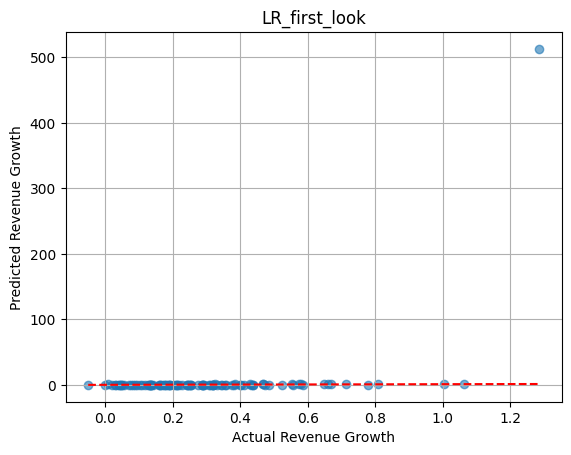

In [7]:
plt.scatter(y_test, model1_prediction, alpha=0.6)
plt.xlabel("Actual Revenue Growth")
plt.ylabel("Predicted Revenue Growth")
plt.title("LR_first_look")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid()
plt.show()

In [8]:
# How to identify this outlier?

In [9]:
# Step 1: Convert to DataFrame for Easier Analysis
# Combine actual and predicted values into a single DataFrame
results_df = pd.DataFrame({
    'actual_growth': y_test.values,
    'predicted_growth': model1_prediction
})

# Add original index to help track back to X_test
results_df['index'] = y_test.index

In [10]:
results_df.head()

,actual_growth,predicted_growth,index
0,0.325983,0.519316,346
1,0.358641,0.448248,378
2,0.133293,0.221920,293
3,0.070742,0.097305,324
4,0.431124,0.243025,179


In [12]:
# Step 2: Find the Outlier
# Find the Outlier

# Sort by predicted growth descending to find the outlier
outlier = results_df.sort_values(by='predicted_growth', ascending=False).head(2)
print(outlier)

    actual_growth  predicted_growth  index
27       1.285133        512.888409     80
61       0.008576          1.293476    227


In [16]:
# Step 3: Trace the Original Feature Values
# Find the row in X_test that caused the outlier
outlier_index = outlier['index'].values[1]
outlier_features = X_test.loc[outlier_index]
print(outlier_features)

revenue                   2793104000.0
netincome                   35446000.0
r&d                        366402000.0
sg&a                      1288591000.0
ebit                       150016000.0
revenuegrowth                 0.924837
ebitmargin                    0.053709
netmargin                     0.012691
rd_to_revenue                 0.131181
sga_to_revenue                0.461347
operatingcashflow          361851000.0
capex                        1390000.0
assets                    6163579000.0
equity                    2138090000.0
totaldebt                 3330533000.0
cash                      1520504000.0
liabilities               4025489000.0
netdebt                   1810029000.0
investedcapital           3948119000.0
freecashflow               360461000.0
capex_to_revenue              0.000498
roa                           0.005751
roe                           0.016578
liabilities_to_equity          1.88275
debt_to_equity                1.557714
nopat                    

Diagnosis:
- revenuegrowth:
  - Value: 1386.45% (Explosive growth);
  - Extreme outlier — far from model training range (any linear model will extrapolate, not interpolate);
- roa, roe, debt ratios:
  - Value: -1.0, -1.0, -1.0
  - placeholder values due to negative equity — dangerous for modeling, but needed;
  - Common in distress / start-ups
- rd_to_revenue & sga_to_revenue:
  - Value:  ~0.44;
  - High investment in R&D and SG&A (typical of early-stage growth; rarely co-occurs with sky-high growth in training set);
  - Rule of 40 culture: early SaaS firms (investors) often accept operating loss as long as growth + EBITDA margin ≈ ≥40 %;
  - At $60 m revenue, spending $27 m on R&D (45 %) and $27 m on SG&A (45 %) is plausible when the goal is to lock-in network effects or platform dominance.
- netdebt, investedcapital:
  - Values: Very negative;
  - Indicates unusual capital structure, perhaps due to high cash and negative equity.
  - Signals large cash buffer + negative equity; flips leverage logic.

Investor interpretation:

A high-spend, hyper-growth strategy is not inherently problematic. In fact, it often reflects an intentional, aggressive expansion funded by earlier equity raises — a "go-for-broke" growth approach.

However, this strategy produces a set of financial signals that confound traditional accounting ratios and valuation models:
How the two patterns interact?

- Cash burn & equity dilution fund the giant R&D + SG&A budgets:
  - The company raises capital through equity issuance;
  - That capital is then aggressively deployed into high R&D and SG&A spending;
  - Result: large operating losses and significant cash burn.
- Accumulated Losses + Intangible Write-offs → Negative Equity;
  - Operating losses accumulate on the income statement;
  - If the firm capitalized intangible assets (e.g. from M&A or internal development: e.g. builds internally software, technology) and later impairs them, this further reduces book equity;
  - Eventually, total shareholders' equity can turn negative — a red flag in traditional ratio analysis.
- Net Cash Still High (Despite Losses);
  - Even with heavy spending, some of the capital raised remains unspent;
  - Result: the firm has strong net cash, i.e., negative net debt (more cash than debt);
  - This is a key liquidity buffer, but it coexists with negative equity — an unusual combination.
- Derived Ratios Break Down:
  - Metrics like return on equity (ROE), debt-to-equity, and price-to-book become meaningless or distorted:
    - Negative equity flips denominators;
    - High R&D depresses profits but builds long-term value — which accounting doesn’t capture.
  - A machine learning model trained on conventional ranges will now see outlier values it wasn't designed to interpret.

Summary:

Negative invested capital and 44 % R&D/Rev are bookends of the same story.

This is a classic pattern in early-stage tech and biotech firms (a venture-style):

1. Aggressive growth funded by equity ->
2. losses and write-offs depress equity, ->
3. but cash from funding keeps liquidity high ->
4. distorted accounting ratios.

**The main reason (apart from the above explanation): Revenue Growth Distortion Due to Data Error**

DUOLINGO was established in 2011, so it is impossible to get data from 2001. 

Upon inspection, the extreme revenue growth observed for some companies (e.g., DUOL) is the result of erroneous historical data from the FMP API. Specifically, the income statement includes a data point from 2001, followed directly by a record from 2019, as shown below:

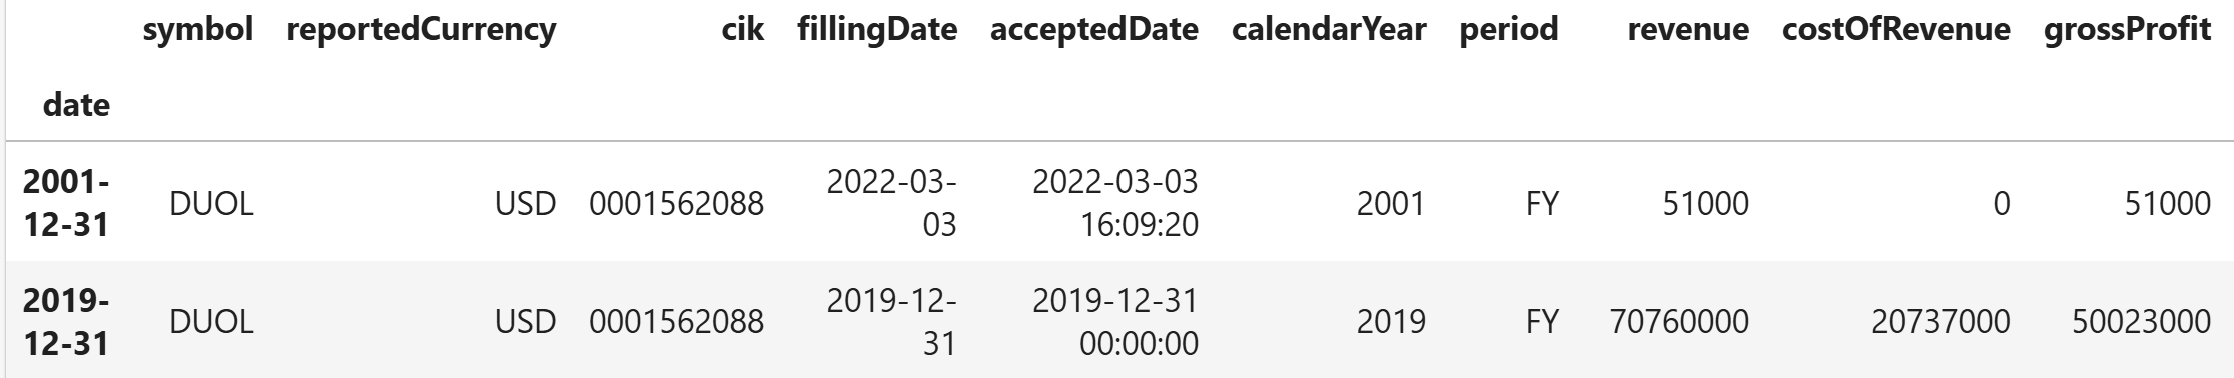

This creates a falsely massive growth jump because the model interprets it as an 18-year compound annual growth starting from a tiny base of $51k.

Root cause: The FMP API incorrectly includes a financial report from 2001, which is likely not genuine or was misattributed. This record is then used in calculating year-over-year revenue growth, resulting in nonsensical revenuegrowth_t+1 values.

Final decision

This is clearly a data integrity issue, not a real financial signal. Therefore:
- This kind of historical inconsistency should be systematically detected and filtered;
- Companies with gaps of multiple years between consecutive financial reports (e.g. jumping from 2001 to 2019) should be excluded or cleaned before calculating growth;
- Growth should only be calculated for consecutive valid years.

In [17]:
# We have found the culprit: It is a DUOL company from 2019 (the biggest outlier)
# and APP from 2021 (2nd biggest outlier)
# let's remove the problematic outlier

Deleting outliers is acceptable in early exploratory modeling — especially to visualize performance or test baseline assumptions — but we must be cautious and transparent about why and how we're doing it. For a production-level model, it's better to diagnose, explain, or robustly handle them rather than just removing them.

We might wnat to remove the outliers in this datset, cuz:
- It distorts the model fit: As we saw, a few extreme values can dramatically skew regression results and plots;
- We are validating the model's “typical” behavior: Removing outliers lets us see how the model behaves on the majority of reasonable cases.

Risks:
- Overfitting to the majority: We may lose information about extreme but valid behavior;
- False sense of accuracy: 	The model may appear better than it is if we remove "hard cases.";
- Unfair model behavior: In production, the model should work on all inputs — not just “nice” ones;
- Financial consequences: If an outlier represents a high-growth firm (like a startup), removing it could bias the valuation or miss a key investment signal.

With this outlier I tried using robust regression or log-transformation (targets and indepodnednt variables). Nothinh helped and my model predicted poorly (It provided r_2 score with the large negative number). By removing only this one point the model drastically uimproved, and I still have a lot of diversed test data to work on.

In [18]:
# Find index of the largest predicted value (extreme outlier)
# outlier_index = np.argmax(model1_prediction)
# print("Outlier index:", outlier_index)

# or if we want to find the Indices of the Two Largest Predictions
outlier_indices = np.argsort(model1_prediction)[-1:]  # last largest
print("Outlier indices:", outlier_indices)

Outlier indices: [27]


In [19]:
# Drop outlier from test data
X_test_cleaned = X_test.drop(X_test.index[outlier_indices])
y_test_cleaned = y_test.drop(y_test.index[outlier_indices])

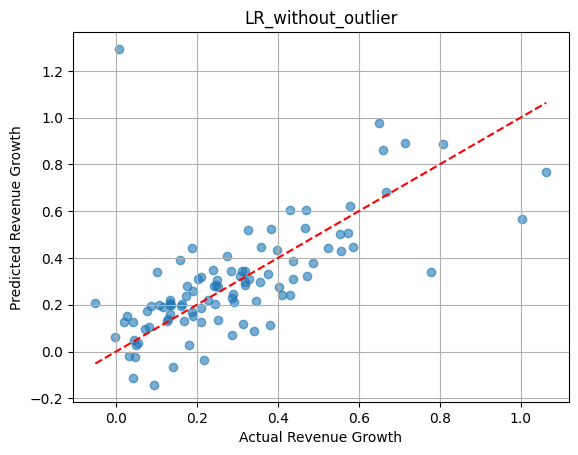

In [20]:
# Predict again on cleaned data
model1_prediction_cleaned = model1.predict(X_test_cleaned)

# Plot updated resulplt

plt.scatter(y_test_cleaned, model1_prediction_cleaned, alpha=0.6)
plt.xlabel("Actual Revenue Growth")
plt.ylabel("Predicted Revenue Growth")
plt.title("LR_without_outlier")
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], 
         [y_test_cleaned.min(), y_test_cleaned.max()], '--r')
plt.grid()
plt.show()

Interpretation:

The red dashed line provides a visual benchmark:
- If the model predicted perfectly, all points would lie on this line;
- Points above the line → model overestimated;
- Points below the line → model underestimated.

It represents the set of points where: Predicted value=Actual value:
- This is the equation of a 45-degree line that goes diagonally from bottom-left to top-right of the plot.
- x-axis = actual values;
- y-axis = predicted values

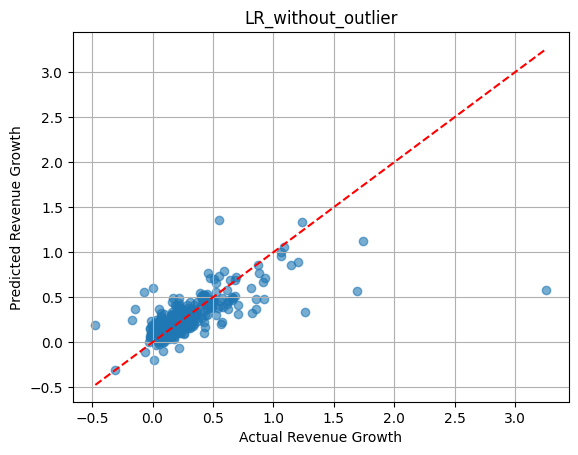

In [21]:
# Let's check training scatter plot
model1_prediction_cleaned = model1.predict(X_train)
plt.scatter(y_train, model1_prediction_cleaned, alpha=0.6)
plt.xlabel("Actual Revenue Growth")
plt.ylabel("Predicted Revenue Growth")
plt.title("LR_without_outlier")
plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], '--r')
plt.grid()
plt.show()

In [22]:
X_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 346 to 30
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   revenue                 98 non-null     float64
 1   netincome               98 non-null     float64
 2   r&d                     98 non-null     float64
 3   sg&a                    98 non-null     float64
 4   ebit                    98 non-null     float64
 5   revenuegrowth           98 non-null     float64
 6   ebitmargin              98 non-null     float64
 7   netmargin               98 non-null     float64
 8   rd_to_revenue           98 non-null     float64
 9   sga_to_revenue          98 non-null     float64
 10  operatingcashflow       98 non-null     float64
 11  capex                   98 non-null     float64
 12  assets                  98 non-null     float64
 13  equity                  98 non-null     float64
 14  totaldebt               98 non-null     float64

In [23]:
# Save both unchanged training & cleaned test set together

# Recreate the cleaned test set with target column
df_test_cleaned = X_test_cleaned.copy()
df_test_cleaned['revenuegrowth_t+1'] = y_test_cleaned

# Save both the cleaned training and test sets in one pickle file
with open("outputs/df_companies_train_test_encoded_CLEANED.pkl", "wb") as f:
    pickle.dump(df_companies_train_encoded, f)  # unchanged training set
    pickle.dump(df_test_cleaned, f)             # cleaned test set

In [24]:
# I approve the removal of the outliers, and replace the x_tes and y_test variables

X_test = X_test_cleaned
y_test = y_test_cleaned

In [25]:
# Coefficients show the marginal effect of each variable, assuming others are constant ("ceteris paribus").
# Features with large coefficients have the strongest influence on the prediction.
# This view is sensitive to multicollinearity (which can inflate or deflate coefficients).
# Consider checking for multicollinearity using VIF, 
# or applying regularization (Ridge/LASSO) to stabilize coefficient estimates (weights).


# Create a Series of model coefficients
coefs = pd.Series(model1.coef_, index=X_train.columns)

# Sort by absolute effect to find top drivers of revenue growth
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=False).index)

print("op 15 predictors by absolute coefficient magnitude:\n")
print(coefs_sorted.head(15))

op 15 predictors by absolute coefficient magnitude:

roa                       0.550421
label_Mega‑Cap Tech       0.374027
revenuegrowth             0.369765
sga_to_revenue            0.366441
label_Consumer SaaS       0.151821
ebitmargin               -0.144684
label_Collab & CX SaaS    0.119969
label_Vertical SaaS       0.116616
label_Cloud & Data        0.102321
label_Enterprise SaaS     0.100325
label_Mature Pivots       0.096311
rd_to_revenue             0.070453
GS10                      0.069310
netmargin                -0.053961
negative_equity_flag      0.051541
dtype: float64


In [26]:
n_near_zero = (coefs.abs() < 1e-6).sum()
print(f"\nℹ️ {n_near_zero} features have coefficients effectively equal to zero (≈ no predictive power).")


ℹ️ 4 features have coefficients effectively equal to zero (≈ no predictive power).


In [27]:
# Use of the model to predict revenuegrowth_t+1 considering test dataset.
# As an input I should use a matrix of test data (predictors), which has the same shape as training data (the same column names and columns).
y_pred = model1.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MedAE
medae = median_absolute_error(y_test, y_pred)

# The results
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 0.11867104700987385
Root Mean Squared Error: 0.1899117859306607
Median Absolute Error: 0.08100259861259215


In [28]:
def regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    return {'RMSE': rmse, 'MAE': mae, 'MedAE': medae, 'MAPE': mape, 'R2': r2}

In [29]:
# On traininig data

print("Regression metrics: traininig data")
print(regression_metrics(y_train, model1.predict(X_train)))
print(" ")

# On test data

print("Regression metrics: test data")
print(regression_metrics(y_test, y_pred))

Regression metrics: traininig data
{'RMSE': 0.21164570054241183, 'MAE': 0.11099466385878226, 'MedAE': 0.0695454876267611, 'MAPE': 197.42462196411427, 'R2': 0.4746813775120461}
 
Regression metrics: test data
{'RMSE': 0.1899117859306607, 'MAE': 0.11867104700987385, 'MedAE': 0.08100259861259215, 'MAPE': 264.35988007903495, 'R2': 0.21444351152654906}


The meaning of the results

1. RMSE – Root Mean Squared Error
- Measures the average magnitude of the error.;
- Penalizes large errors more heavily (because it squares them);
- Interpreted in the same units as the target variable (here: revenuegrowth_t+1).

In my case:
- Train RMSE = 0.21 → very small average error.
- Test RMSE = 0.18.

2. MAE – Mean Absolute Error
- Measures average absolute difference between prediction and true value.
- Less sensitive to outliers than RMSE.
- Easy to interpret: “On average, we’re off by this much.”

In my case:
- MAE = 0.11 (train) → great.
- MAE = 0.11 (test).

3. MedAE – Median Absolute Error
- Tells the typical size of an error;
- Robust to outliers — 50% of the predictions have smaller error than this.

In my case:
- MedAE = 0.07 (train), 0.08 (test) → very close.
- So most predictions are pretty good, but there are a few extreme failures (outliers) ruining RMSE and R².

4. MAPE – Mean Absolute Percentage Error
- Expresses error as a percentage of the true value;
- Very intuitive, but highly unstable if y_i is near zero.

In my case:
- MAPE = 197% (train) and 264% (test) → extremely high and likely meaningless.
- This is because many y values are close to 0, and division by small numbers inflates the percentage error.

5. R² – Coefficient of Determination
- How much variance in the target variable the model explains;
  - R² = 1 → perfect model
  - R² = 0 → no better than predicting the mean
  - R² < 0 → worse than predicting the mean.
In my case:
- R² = 0.47 (train) → model explains ~47% of variance in training set.
- R² = 0.21 (test) → catastrophic. Worse than predicting the average revenue growth for all companies.

The model is overfitting:
- It's capturing noise in the training set that doesn't generalize;
- Possibly due to:
  - Too many features (especially dummies from label);
  - Correlated predictors;
  - Nonlinear relationships not captured by a linear model

What should we do next?
-  Standardize features: Needed for Lasso/Ridge
-  Try Ridge Regression: Penalizes large coefficients, combats multicollinearity
-  Try Lasso Regression: Performs variable selection, may zero out irrelevant features;
-  Inspect residuals & predictions: See if errors cluster by label;
-  Transform target (log1p): Helps with skewed target distribution and stabilizes MAPE
-  Remove or Winsorize outliers: Especially those with extremely high growth.

In [30]:
# Let's standardize the data and check if our results will be better

# Standardized Linear Regression: Full Evaluation Pipeline

# Build and fit pipeline: StandardScaler + LinearRegression
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

# Predict on both sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("Training Metrics:\n", regression_metrics(y_train, y_train_pred))
print("\nTest Metrics:\n", regression_metrics(y_test, y_test_pred))

Training Metrics:
 {'RMSE': 0.21164570054091622, 'MAE': 0.11099460975719769, 'MedAE': 0.06954520326269958, 'MAPE': 197.42441607350216, 'R2': 0.47468137751947037}

Test Metrics:
 {'RMSE': 0.18991177073768317, 'MAE': 0.1186711495656279, 'MedAE': 0.08100299173642206, 'MAPE': 264.35946354083234, 'R2': 0.21444363721586912}


It seems that adding standardization alone did not help my model to provide better predictions.

We can use our hand-picked features from before and check if maybe this will help. 

**Hand picked cariables from notebook 4. Variable_Selection_filter_methods**

In [31]:
# I will use my hand-picked features from "4. Variable_Selection Noyebook"

# Load unencoded train/test data
df_train = pd.read_pickle("outputs/df_companies_train.pkl")
df_test = pd.read_pickle("outputs/df_companies_test.pkl")

# One-hot encode the 'label' categorical variable
df_train_encoded = pd.get_dummies(df_train, columns=['label'], drop_first=False)
df_test_encoded = pd.get_dummies(df_test, columns=['label'], drop_first=False)

# Align columns to ensure train/test have the same features
df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join='left', axis=1, fill_value=0)

# Load hand-picked features (excluding 'label')
with open("outputs/companies_selected_vars.pkl", "rb") as f:
    companies_selected_vars = pickle.load(f)

# Remove 'label' from the selected feature list
companies_selected_vars = [var for var in companies_selected_vars if var != 'label']

# Add one-hot encoded label columns
label_columns = [col for col in df_train_encoded.columns if col.startswith("label_")]
companies_selected_vars_encoded = companies_selected_vars + label_columns

# Define model input/output
X_train_sel = df_train_encoded[companies_selected_vars_encoded]
X_test_sel = df_test_encoded[companies_selected_vars_encoded]
y_train_sel = df_train_encoded["revenuegrowth_t+1"]
y_test_sel = df_test_encoded["revenuegrowth_t+1"]

In [32]:
model_sel_std = make_pipeline(StandardScaler(), LinearRegression())
model_sel_std.fit(X_train_sel, y_train_sel)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [33]:
# Predict on full X_test_sel to find outliers
y_test_pred_sel_full = model_sel_std.predict(X_test_sel)

# Compute absolute errors between prediction and actual
errors = np.abs(y_test_pred_sel_full - y_test_sel)

# Get indices of one/two biggest errors (or predictions)
outlier_indices_sel = errors.nlargest(1).index    

# Drop from test set using the correct index
X_test_sel_cleaned = X_test_sel.drop(index=outlier_indices_sel)
y_test_sel_cleaned = y_test_sel.drop(index=outlier_indices_sel)

In [34]:
# Inspect the Outliers

# Inspect the outlier rows
outlier_X = X_test_sel.loc[outlier_indices_sel]
outlier_y = y_test_sel.loc[outlier_indices_sel]

# Convert predictions to a pandas Series using the same index as X_test_sel
y_test_pred_sel_full_series = pd.Series(y_test_pred_sel_full, index=X_test_sel.index)

# Now extract the outlier predictions safely
outlier_pred = y_test_pred_sel_full_series.loc[outlier_indices_sel]

outlier_df = pd.DataFrame({
    'actual_growth': outlier_y,
    'predicted_growth': outlier_pred
}, index=outlier_indices_sel)

outlier_df

,actual_growth,predicted_growth
80,1.285133,562.679238


In [35]:
# Track the outliers
outlier_index = outlier['index'].values[0]
outlier_features = X_test_sel.loc[outlier_index]
print(outlier_features)

revenuegrowth              1386.45098
sga_to_revenue               0.443188
ebitmargin                  -0.182264
rd_to_revenue                0.446015
CPIAUCSL                   255.652583
GDPC1                       20985.448
liabilities               179035000.0
label_AI‑DevOps                 False
label_Cloud & Data              False
label_Collab & CX SaaS          False
label_Consumer SaaS              True
label_Enterprise SaaS           False
label_Mature Pivots             False
label_Mega‑Cap Tech             False
label_Vertical SaaS             False
Name: 80, dtype: object


In [36]:
# Predict Again and Evaluate
# Predict on cleaned test data
y_train_pred_sel = model_sel_std.predict(X_train_sel)
y_test_pred_sel_cleaned = model_sel_std.predict(X_test_sel_cleaned)

# Evaluate performance
train_metrics_final = regression_metrics(y_train_sel, y_train_pred_sel)
test_metrics_final = regression_metrics(y_test_sel_cleaned, y_test_pred_sel_cleaned)

train_metrics_final, test_metrics_final

({'RMSE': 0.2227793546260537,
  'MAE': 0.11774519254701747,
  'MedAE': 0.07824899475321494,
  'MAPE': 179.37083981177923,
  'R2': 0.4179587311142099},
 {'RMSE': 0.13402014523108546,
  'MAE': 0.09533179127423831,
  'MedAE': 0.06053219416974505,
  'MAPE': 134.74204859770776,
  'R2': 0.6087865722859245})

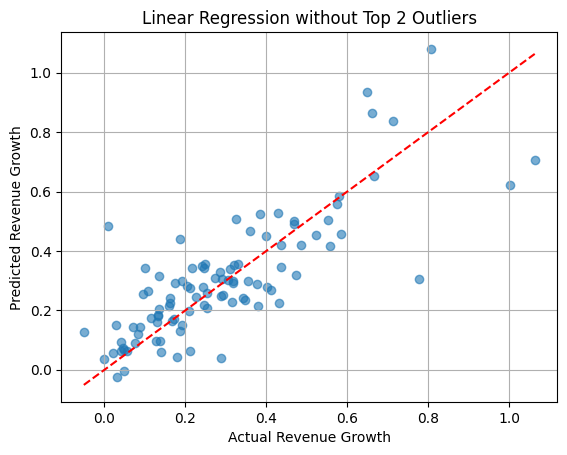

In [37]:
# Visualize the Cleaned Fit
plt.scatter(y_test_sel_cleaned, y_test_pred_sel_cleaned, alpha=0.6)
plt.xlabel("Actual Revenue Growth")
plt.ylabel("Predicted Revenue Growth")
plt.title("Linear Regression without Top 2 Outliers")
plt.plot([y_test_sel_cleaned.min(), y_test_sel_cleaned.max()],
         [y_test_sel_cleaned.min(), y_test_sel_cleaned.max()], '--r')
plt.grid()
plt.show()

Coclusion:
- this new model (after removing outliers) is better overally;
- hand-picking variables and encoding properly is a good practice. which can highly improve the prediction;

What to do next
1. Ridge Regression — stabilize coefficients;
2. Log-transform the target — tame huge outlier (wqe removed those huge outliers);
3. Random Forest Regressor — model interactions + nonlinearitie;
4. Visual residual analysis — understand where exactly the model fails.

**Initial variables filtering using our modelu**

In [38]:
X = sm.add_constant(X_train.filter(like="label", axis = 1))

X.head()

,const,label_Cloud & Data,label_Collab & CX SaaS,label_Consumer SaaS,label_Enterprise SaaS,label_Mature Pivots,label_Mega‑Cap Tech,label_Vertical SaaS
349,1.0,0,0,0,0,0,0,0
185,1.0,0,0,0,1,0,0,0
466,1.0,1,0,0,0,0,0,0
273,1.0,0,0,1,0,0,0,0
446,1.0,0,0,0,0,0,0,1


In [39]:
# Dependent variable
y = df_companies_train_encoded["revenuegrowth_t+1"]  

# Estimating the model
model_ = sm.OLS(y, X).fit()

# Calculating R2
print(model_.rsquared)

# And adjusted R2
print(model_.rsquared_adj)

0.038252071958683076
0.020856114603930442


In [40]:
# the function conducting linear regression
# with one independent variable (eac from the input list) 
# and calculating choosen metrics


def filtering_with_OLS(df, y_var, x_vars):

    X = df.drop(columns = y_var)
    y = df[y_var]

    results = []

    for x_var in x_vars:
        # filtering coosen variables
        X_ = sm.add_constant(X.filter(like = x_var, axis = 1))

        # if it doesn't exist, we should ignore it
        # ❌ “Skip the rest of the current loop iteration, and move to the next item in the loop.”
        if X_.shape[1] == 1:
            print(f" The variable does not exist '{x_var}'.")
            continue
        
        # Fitting the model
        model = sm.OLS(y, X_).fit()

        # Prediction
        y_pred = model.predict(X_)

        # Calculating choosen metrics
        mae = mean_absolute_error(y, y_pred)
        medae = median_absolute_error(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        mape = np.mean(np.abs((y - y_pred) / y)) * 100

        # Saving the results
        results.append({
            "variables": x_var,
            "R2": model.rsquared,
            "Adj_R2": model.rsquared_adj,
            "AIC": model.aic,
            "BIC": model.bic,
            "MAE": mae,
            "MedAE": medae,
            "RMSE": rmse,
            "MAPE_pct": mape
        })

    # Conversion to the dataframe and returning the results
    return pd.DataFrame(results)

In [41]:
filtering_with_OLS(df_companies_train_encoded, "revenuegrowth_t+1", ["label"])

,variables,R2,Adj_R2,AIC,BIC,MAE,MedAE,RMSE,MAPE_pct
0,label,0.038252,0.020856,149.091783,180.922869,0.174286,0.125091,0.286371,248.263697


In [42]:
# Upload dataset BEFORE encoding to take the original list of the variables

companies_train = pd.read_pickle("outputs/df_companies_train.pkl")

In [43]:
# we have to drop inthe original dataset "negative_equity_flag" col, becouse it is a bool datatype variable.
df_companies_train_encoded = df_companies_train_encoded.drop(columns=["negative_equity_flag"])

In [44]:
predyktory = companies_train.drop(columns=['revenuegrowth_t+1']).columns

print(predyktory)

Index(['revenue', 'netincome', 'r&d', 'sg&a', 'ebit', 'revenuegrowth',
       'ebitmargin', 'netmargin', 'rd_to_revenue', 'sga_to_revenue',
       'operatingcashflow', 'capex', 'assets', 'equity', 'totaldebt', 'cash',
       'liabilities', 'netdebt', 'investedcapital', 'freecashflow',
       'capex_to_revenue', 'roa', 'roe', 'liabilities_to_equity',
       'debt_to_equity', 'nopat', 'roic', 'sales_to_capital',
       'fcf_to_netincome', 'label', 'GDPC1', 'CPIAUCSL', 'FEDFUNDS', 'UNRATE',
       'GS10', 'UMCSENT', 'negative_equity_flag'],
      dtype='object')


In [52]:
# Let's use the above function
filtered_variables = filtering_with_OLS(df_companies_train_encoded,
                                        'revenuegrowth_t+1',
                                        predyktory)

filtered_variables.sort_values(by="R2", ascending=False).reset_index(drop=True).head(15)

 The variable does not exist 'negative_equity_flag'.


,variables,R2,Adj_R2,AIC,BIC,MAE,MedAE,RMSE,MAPE_pct
0,revenue,0.371072,0.362988,-22.678916,1.194399,0.121278,0.076758,0.231579,145.031819
1,revenuegrowth,0.301500,0.299723,10.763889,18.721661,0.124458,0.073917,0.244051,184.950788
2,sga_to_revenue,0.186328,0.184258,71.049534,79.007306,0.154629,0.106592,0.263404,185.128142
3,ebit,0.145095,0.140733,92.575829,104.512486,0.155089,0.103797,0.269996,248.749690
4,ebitmargin,0.145062,0.142886,90.591104,98.548876,0.155127,0.104138,0.270001,248.648014
5,netmargin,0.104818,0.102540,108.760385,116.718157,0.162521,0.112856,0.276283,260.527118
6,rd_to_revenue,0.094582,0.092278,113.251417,121.209188,0.164367,0.116061,0.277858,243.227461
7,CPIAUCSL,0.079194,0.076851,119.908165,127.865937,0.167014,0.106602,0.280209,280.861529
8,GDPC1,0.073383,0.071026,122.392884,130.350655,0.168074,0.112759,0.281092,281.259335
9,UMCSENT,0.066554,0.064178,125.293629,133.251400,0.169610,0.113565,0.282126,273.776724


In [46]:
# We can choose 20 variables that are the most correlated 
# with our target vaiable based on R2

variables_top20_R2 = filtered_variables.sort_values(by = "R2", ascending = False)["variables"].head(20).tolist()

variables_top20_R2

['revenue',
 'revenuegrowth',
 'sga_to_revenue',
 'ebit',
 'ebitmargin',
 'netmargin',
 'rd_to_revenue',
 'CPIAUCSL',
 'GDPC1',
 'UMCSENT',
 'roa',
 'GS10',
 'label',
 'FEDFUNDS',
 'sg&a',
 'netincome',
 'liabilities',
 'sales_to_capital',
 'UNRATE',
 'assets']

In [3]:
(0.609 - 0.418)/0.418

0.45693779904306225

In [4]:
0.609/0.418

1.4569377990430623